# numpy

## Задача №1. Скользящее окно

Реализовать функцию скользящего окна для заданного одномерного ряда данных, формирующую из него матрицу по следующему правилу:

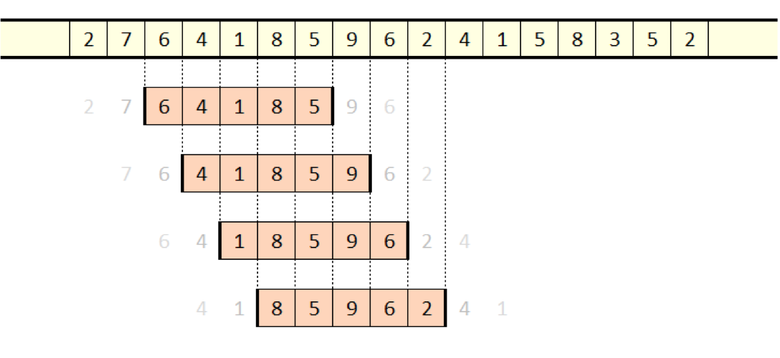

Аргументы функции:

*x_array* - одномерный массив **numpy.ndarray**

*w* - ширина окна для итоговой матрицы

*step* - шаг окна по исходному одномерному ряду данных

Результат:

*A_matrix* - матрица скользящего среднего

In [ ]:
import numpy as np

In [ ]:
def sliding_window(x_array, w, step = 1):

    A_matrix = np.zeros((0, w))
    for i in range(0, len(x_array) - w + 1, step):
        A_matrix = np.vstack([A_matrix, x_array[i:i + w]])

    return A_matrix

In [ ]:
# проверка 1
window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])

print(np.array_equal(sliding_window(x1, w=window, step=step_s),A1))

# проверка 2
window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s),A2))

True
True


# **Анализ данных по доходу населения UCI Adult**


Автор материала: Юрий Кашницкий (@yorko в Slack ODS). Материал распространяется на условиях лицензии Creative Commons CC BY-NC-SA 4.0. Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult)**

Уникальные значения признаков (больше информации по ссылке выше):

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep = ", ", header=None,
                   names = ["age", "workclass", "fnlwgt", "education",
                    "education-num", "marital-status", "occupation", "relationship",
                    "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"])

list_of_objects = data.dtypes.axes[0][data.dtypes == "object"]
data[list_of_objects] = data[list_of_objects].astype("string")

data.head()

<ipython-input-4-594c77567b47>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep = ", ", header=None,


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## **0. Изучить в документации методы groupby и agg**

## **1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?**

### Визуализировать результат

In [ ]:
df = data.groupby('sex').size()
print(df)

sex
Female    10771
Male      21790
dtype: int64


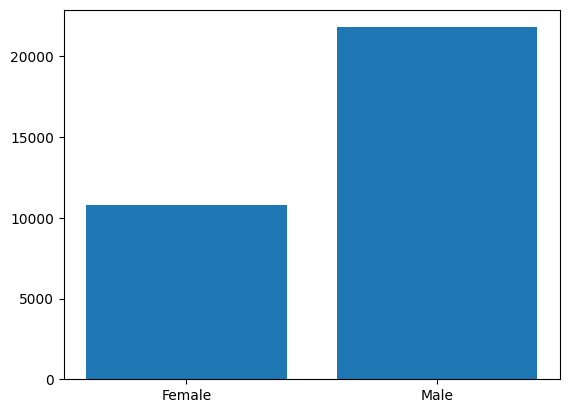

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.bar(df.index, df.values)

plt.show()

## **2. Каков средний возраст (признак age) женщин?**

In [ ]:
print(data[data['sex'] == 'Female']['age'].mean())

36.85823043357163


## **3. Какова доля граждан Германии (признак native-country)?**

In [ ]:
n = data[data['native-country'] == 'Germany'].count() / data['native-country'].count()
print(n['native-country'])

0.004207487485028101


## **4-5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?**

### Визуализировать результат

In [ ]:
more = data[data['salary'] == '>50K']['age'].mean()
less = data[data['salary'] == '<=50K']['age'].mean()

print(less)
print(more)

more_std = np.std(data[data['salary'] == '>50K']['age'])
less_std = np.std(data[data['salary'] == '<=50K']['age'])

print(less_std)
print(more_std)

36.78373786407767
44.24984058155847
14.019804910115282
10.51835692766163


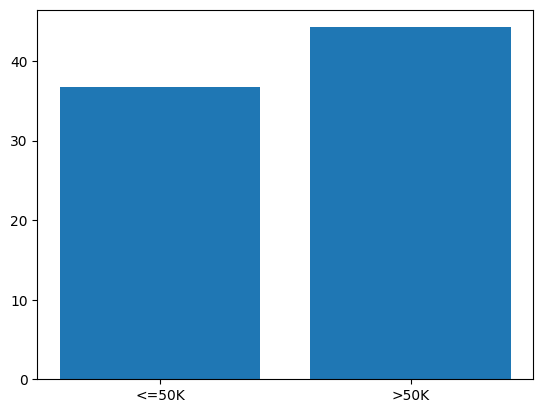

In [ ]:
x = ['<=50K', '>50K']
y = [less, more]
plt.bar(x, y)
plt.show()

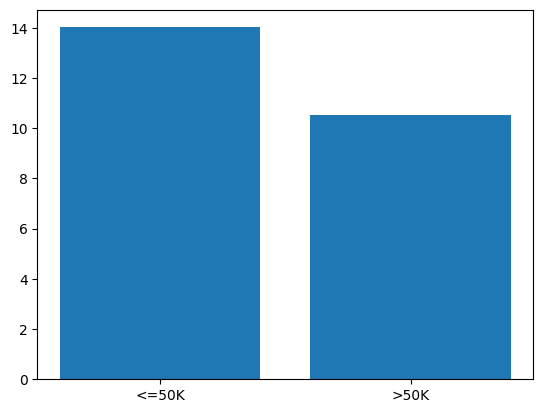

In [ ]:
x = ['<=50K', '>50K']
y = [less_std, more_std]
plt.bar(x, y)
plt.show()

## **6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)**

In [ ]:
ed = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
n = len(data[(data['salary'] == '>50K') & (~data['education'].isin(ed))])
print(n)
print('False') if n else print('True')

3306
False


## **7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.**

In [ ]:
df = data.groupby(['race', 'sex'])['age'].describe()
print(df)
df['max']['Amer-Indian-Eskimo', 'Male']

                             count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex

82.0

## **8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

### Визуализировать результат

In [ ]:
married = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
k_married_m50 = len(data[(data['salary'] == '>50K') & (data['marital-status'].isin(married))])
k_married = len(data[data['marital-status'].isin(married)])
k_unmarried_m50 = len(data[(data['salary'] == '>50K') & (~data['marital-status'].isin(married))])
k_unmarried = len(data[~data['marital-status'].isin(married)])
print(k_married_m50 / k_married)
print(k_unmarried_m50 / k_unmarried)

0.43692028280469614
0.0644540363975735


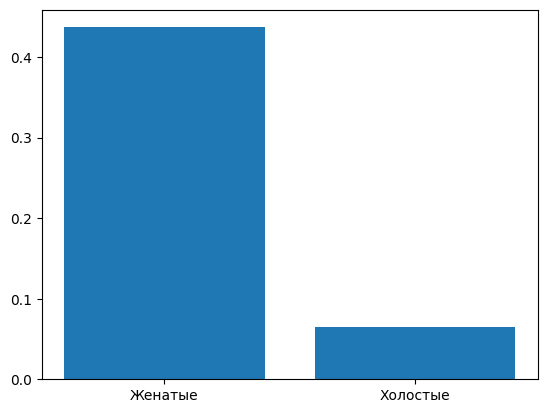

In [ ]:
x = ['Женатые', 'Холостые']
y = [k_married_m50 / k_married, k_unmarried_m50 / k_unmarried]
plt.bar(x, y)
plt.show()

## **9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [ ]:
max = data['hours-per-week'].max()
print(max)
k = data[data['hours-per-week'] == max].shape[0]
print(k)
more50 = data[(data['hours-per-week'] == max) & (data['salary'] == '>50K')].shape[0]
print(more50 / k)

99
85
0.29411764705882354


## **10. Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).**

### Визуализировать результат

In [ ]:
df = data.groupby(['salary', 'native-country'])['hours-per-week'].mean()
df

salary  native-country 
<=50K   ?                  40.164760
        Cambodia           41.416667
        Canada             37.914634
        China              37.381818
        Columbia           38.684211
                             ...    
>50K    Thailand           58.333333
        Trinadad&Tobago    40.000000
        United-States      45.505369
        Vietnam            39.200000
        Yugoslavia         49.500000
Name: hours-per-week, Length: 82, dtype: float64

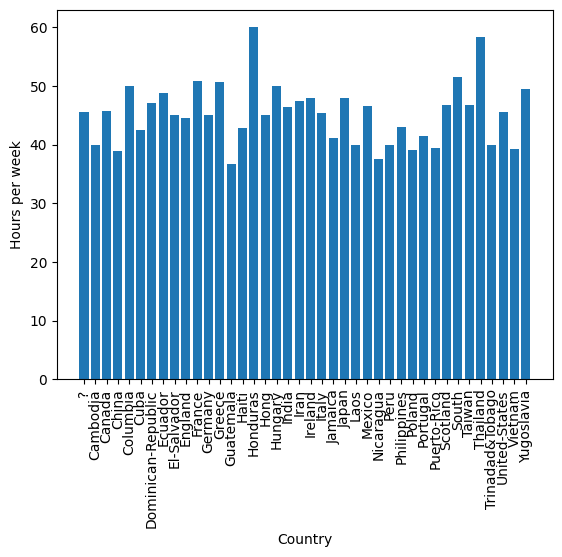

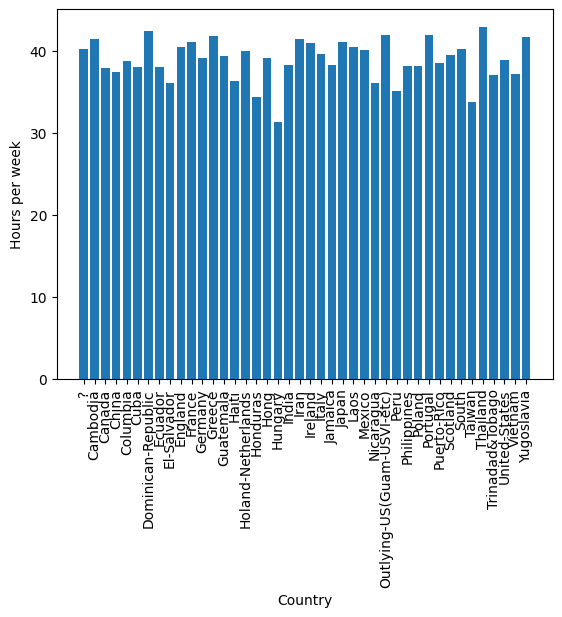

In [ ]:
df_more50 = df['>50K']
df_less50 = df['<=50K']
plt.bar(df_more50.index, df_more50.values, linewidth = 1.5)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Hours per week')
plt.show()
plt.bar(df_less50.index, df_less50.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Hours per week')
plt.show()